# 3.3 Binary classification


 We can compare them all in one [exercise](!https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).


In [1]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# basic tools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# classifiers from sklearns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


### 1.1 Synthetic Data
First, we start making new data using the scikitlearn tools.

In [2]:
# make a data set
X, y = make_moons(noise=0.3, random_state=0)

Plot the data

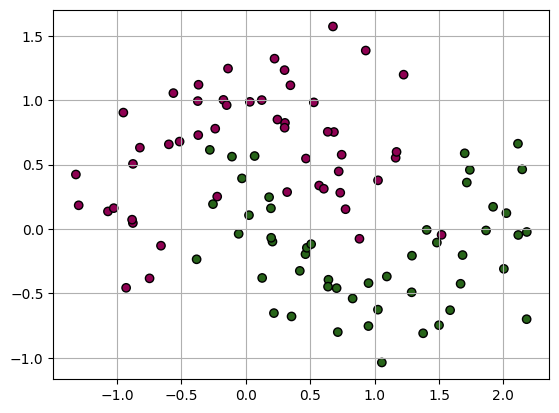

In [3]:
plt.scatter(X[:,0],X[:,1],c=y, cmap='PiYG', edgecolors="k");plt.grid(True)

We will start with the fundamental LDA.

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# define ML
clf = LinearDiscriminantAnalysis() 

# normalize data.
X = StandardScaler().fit_transform(X)

# split data between train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the model.
clf.fit(X_train, y_train)

# calculate the mean accuracy on the given test data and labels.
score = clf.score(X_test, y_test)
print("The mean accuracy on the given test and labels is %f" %score)

The mean accuracy on the given test and labels is 0.875000


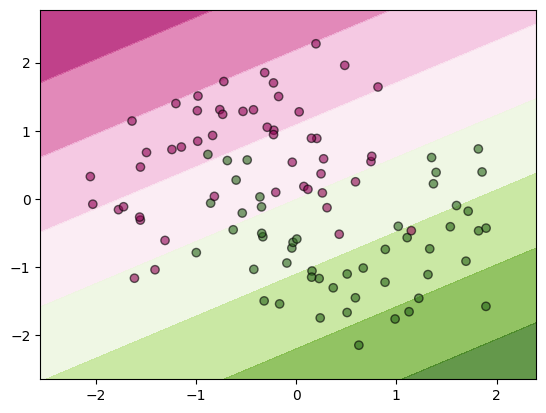

In [5]:

from sklearn.inspection import DecisionBoundaryDisplay
ax = plt.subplot()
# plot the decision boundary as a background
DecisionBoundaryDisplay.from_estimator(clf, X, cmap='PiYG', alpha=0.8, ax=ax, eps=0.5)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='PiYG', alpha=0.6, edgecolors="k")


The results shows a not-too bad classification, but a low confidence.

Let's try a different classifer: KNN



In [6]:
# define ML
K = 5
clf= KNeighborsClassifier(K)

# normalize data.
X = StandardScaler().fit_transform(X)

# split data between train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the model.
clf.fit(X_train, y_train)

# calculate the mean accuracy on the given test data and labels.
score = clf.score(X_test, y_test)
print("The mean accuracy on the given test and labels is %f" %score)

The mean accuracy on the given test and labels is 0.975000


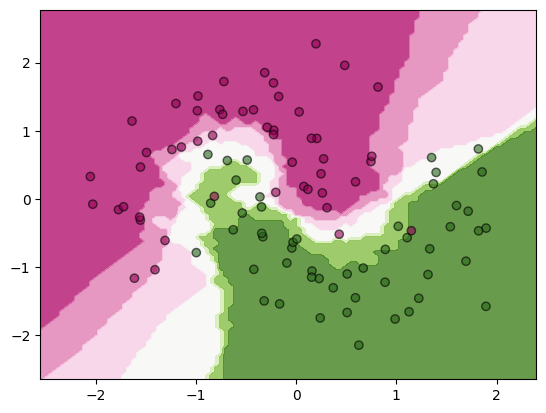

In [7]:
# plot the decision boundary as a background
ax = plt.subplot()
DecisionBoundaryDisplay.from_estimator(clf, X, cmap='PiYG', alpha=0.8, ax=ax, eps=0.5)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='PiYG', alpha=0.6, edgecolors="k")

Now we will test to see what happens when you do not **normalize** your data before the classification. We will stretch the first axis of the data to see the effects.

In [13]:
# make a data set
X, y = make_moons(noise=0.3, random_state=0)
X[:,0] = 10*X[:,0]
X[:,1] = 10*X[:,1]

The mean accuracy on the given test and labels is 0.975000


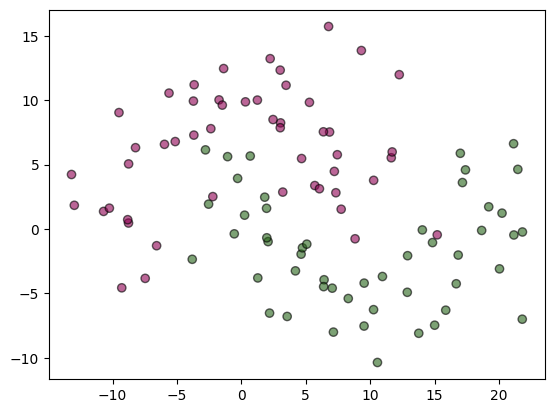

In [14]:

# define ML
K = 5
clf= KNeighborsClassifier(K)

# split data between train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the model.
clf.fit(X_train, y_train)

# calculate the mean accuracy on the given test data and labels.
score = clf.score(X_test, y_test)
print("The mean accuracy on the given test and labels is %f" %score)

# plot the decision boundary as a background
ax = plt.subplot()
# DecisionBoundaryDisplay.from_estimator(clf, X, cmap='PiYG', alpha=0.8, ax=ax, eps=0.5)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='PiYG', alpha=0.6, edgecolors="k")


This drastically reduces the performance.

## 2. Classifier Performance Metrics

In a binary classifier, we label one of the two classes as *positive*, the other class as *negative*. Let's consider *N* data samples.

| True Class \ predicted Class     | Positive            | Negative           | **Total** |
|  -------------  |  -----------------  |  --------------- | ----- |
| Positive        | True Positive   | False Negative | p     |
| Negative        | False Positive  | True Negative  | n     |
| **Total**       | p'                  | n'                 | N     |

In this example, there were originally a total of $p=FN+TP$ positive labels and $n=FP+TN$ negative levels. We ended up with $p'=TP+FP$ predicted as positive and $n'=FN+TN$ predicted as negative.

**True positive TP**: the number of data predicted as *positive* that were originally *positive*. 

**True negative TN**: the number of data predicted as *negative* that were originally *negative*.

**False positive FP**: the number of data predicted as *positive* but that were originally *negative*.

**False negative FN**: the number of data predicted as *negative* that were originally *positive*. 

**Confusion matrix:**
Count the instances that an element of class *A* is classified in class *B*. A 2-class confusion matrix is:

$ C = \begin{array}{|cc|} TP & FN \\ FP  & TN \end{array}$

The confusion matrix can be extended for a multi-class classification and the matrix is KxK instead of 2x2. The best confusion matrix is one that is close to identity, with little off diagonal terms.

**Other model performance metrics**
Model peformance can be assessed with the following:
* **Error** : the fraction of the data that was misclassified 

    $err = \frac{FP+FN}{N}$  -> 0
* **Accuracy**: the fraction of the data that was correctly classified: 
    
    $acc = \frac{TP+TN}{N} = 1 - err $ --> 1

* **TP-rate**: the ratio of samples predicted in the *positive* class that are correctly classified:

    $TPR = \frac{TP}{TP+FN}$ --> 1
    
    This ratio is also the **recall** value or **sensitivity**.

* **TN-rate**: the ratio of samples predicted in the *negative* class that are correctly classified:

    $TNR = \frac{TN}{TN+FP}$ --> 1
    
    This ratio is also the **specificity**.

* **Precision**: the ratio of samples predicted in the *positive* class that were indeed *positive* to the total number of samples predicted as *positive*.

    $pr = \frac{TP}{TP+FP}$ --> 1
 
* **F1 score**:

    $F_1 = \frac{2}{(1/ precision + 1/recall)} = \frac{TP}{TP + (FN+FP)/2} $ --> 1.

    
The harmonic mean of the F1 scores gives more weight to low values. F1 score is thus high if both recall and precision are high.


***How do precision and recall co-vary?***

In [ ]:
def returnPrecisionAndRecall(TP, FP, TN, FN):
    precision = TP / (TP + FP) if (TP + FP) else 0
    recall = TP / (TP + FN) if (TP + FN) else 0
    return {'precision': precision, 'recall': recall}

# Okay, set how many true and false values are in the original dataset

actualTrueValues = 50
actualFalseValues = 50

sumValues = 100

precisionRecallCollector = []

# Now, run a set of simulations

for n in range(5000):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    # Begin by randomly setting the total number of true values returned
    totalTrue = np.random.randint(0, high=sumValues)
    # The total number of false values is sumValues - totalTrue
    totalFalse = sumValues - totalTrue
    # Partition totalTrue and totalFalse into TP, FP and TN, FN, respectively
    if totalTrue != 0:
        TP = np.random.randint(0, high=totalTrue)
        FP = totalTrue - TP
    if totalFalse != 0:
        TN = np.random.randint(0, high=totalFalse)
        FN = totalFalse - TN
    thisPandR = returnPrecisionAndRecall(TP, FP, TN, FN)
    precisionRecallCollector.append([thisPandR['precision'], thisPandR['recall']])

In [ ]:
pAndRArray = np.asarray(precisionRecallCollector)
plt.scatter(pAndRArray[:,0], pAndRArray[:,1], color='k', alpha=0.25)
plt.xlabel('Precision')
plt.ylabel('Recall')

From above, we see that a wide range of behavior between precision and recall can be expected. It is not because a classifier might do well in predicting one class than it does predicting the other class. This demonstrates the important of reporting both metrics.

Let's print these measures from our classification using scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score 

# Fit the model.
y_test_pred=clf.predict(X_test)

print("confusion matrix")
print(confusion_matrix(y_test,y_test_pred))
print("precison, recall")
print(precision_score(y_test,y_test_pred),recall_score(y_test,y_test_pred))
print("F1 score")
print(f1_score(y_test,y_test_pred))

A complete well-formatted report of the performance can be called using the function ``classification_report``:

In [ ]:
from sklearn.metrics import classification_report
print(f"Classification report for classifier {clf}:\n"
      f"{classification_report(y_test, y_test_pred)}\n")

**Precision and recall trade off**: increasing precision reduces recall.

$precision = \frac{TP}{TP+FP}$ 

$recall = \frac{TP}{TP+FN}$ 


The classifier uses a *threshold* value to decide whether a data belongs to a class. Increasing the threshold gives higher precision score, decreasing the thresholds gives higher recall scores. Let's look at the various score values.

**Receiver Operating Characteristics ROC** 

It plots the true positive rate against the false positive rate.
The ROC curve is visual, but we can quantify the classifier performance using the *area under the curve* (aka AUC). Ideally, AUC is 1.

![ROC curve](roc-curve-v2-glassbox.png)

[source: https://commons.wikimedia.org/wiki/File:Roc-draft-xkcd-style.svg]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score


y_scores = clf.predict_proba(X_train)
fpr,tpr,thresholds=roc_curve(y_train,y_scores[:,1])
plt.plot(fpr,tpr,linewidth=2);plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1],'k--')

We now explore the different classifiers packaged in scikit learn. We can systematically test their performance and save the precision, recall, 

In [ ]:
# define models
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]



## 3. Model exploration

* Explore How each of these models perform on the synthetic data. 

* Save in an array the precision, recall, F1 score values.

* Find the best performing model

In [ ]:
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
pre=np.zeros(len(classifiers))
rec=np.zeros(len(classifiers))
f1=np.zeros(len(classifiers))
for ii,iclass in enumerate(classifiers):
    iclass.fit(X_train, y_train)
    y_test_pred=iclass.predict(X_test)
    pre[ii] =precision_score(y_test,y_test_pred)
    rec[ii] =recall_score(y_test,y_test_pred)
    f1[ii] =f1_score(y_test,y_test_pred)

df=pd.DataFrame({'CLF name':names,'precision':pre,'recall':rec,'f1_score':f1})
print(df)
